In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def approche_gloutonne(T):
    N = len(T)
    cout = T[0][0]
    path = [0]
    j = 0
    for i in range(1,N):
        if(T[i][j+1] > T[i][j]):
            path.append(j+1)
            j=j+1
        else:
            path.append(j)

        cout += T[i][j]
    return path,cout

In [3]:
def approche_optimale(T,i=0, j=0, M=[]):
    if i == 0:
        # init path tab
        M = []
        for x in range(len(T)):
            M.append([])
            for y in range(len(T[x])):
                M[x].append(0)

    if i == len(T)-1:
        M[i][j] = T[i][j]
        return M
    
    M = approche_optimale(T, i+1, j,M)
    M = approche_optimale(T, i+1, j+1,M)
    
    M[i][j] = T[i][j] + max(M[i+1][j],M[i+1][j+1])
    return M  

In [4]:
Tr = [
    [1],
    [3,4],
    [5,20,3],
    [14,16,4,50],
    [2,19,1,1,5],
]

## Optimale
print("-- Approche optimale --")
Mre = approche_optimale(Tr)

print("\t- Chemin pris -")
indic_i = 0
indic_j = 0
print("(0)"+str(Tr[indic_i][indic_j]),end="")
for indic_i in range(len(Mre)-1):
    print( " ---> ", end="" )
    if(Mre[indic_i+1][indic_j] < Mre[indic_i+1][indic_j+1]):
        indic_j += 1
    print("("+str(indic_j)+")"+str(Tr[indic_i+1][indic_j]),end="")    
print("")

print("\t- Coût du chemin : " + str(Mre[0][0]) + " -")

## Gloutonne
print("\n-- Approche gloutonne -- ")
path_glou,cout_glou = approche_gloutonne(Tr)
print("\t- Chemin pris -")
print("(0)"+str(Tr[0][0]),end="")
for i in range(1,len(path_glou)):
    print(" ---> ("+str(path_glou[i])+")"+str(Tr[i][path_glou[i]]), end="")
print("")
print("\t- Coût du chemin : " + str(cout_glou) + " -")

-- Approche optimale --
	- Chemin pris -
(0)1 ---> (1)4 ---> (2)3 ---> (3)50 ---> (4)5
	- Coût du chemin : 63 -

-- Approche gloutonne -- 
	- Chemin pris -
(0)1 ---> (1)4 ---> (1)20 ---> (1)16 ---> (1)19
	- Coût du chemin : 60 -


- For N : 1 - time : 0.0s
- For N : 2 - time : 0.0s
- For N : 3 - time : 0.0s
- For N : 4 - time : 0.0s
- For N : 5 - time : 0.0s
- For N : 6 - time : 0.0s
- For N : 7 - time : 0.0s
- For N : 8 - time : 0.0s
- For N : 9 - time : 0.0s
- For N : 10 - time : 0.0s
- For N : 11 - time : 0.0s
- For N : 12 - time : 0.0s
- For N : 13 - time : 0.0s
- For N : 14 - time : 0.01s
- For N : 15 - time : 0.01s
- For N : 16 - time : 0.02s
- For N : 17 - time : 0.05s
- For N : 18 - time : 0.1s
- For N : 19 - time : 0.2s
- For N : 20 - time : 0.4s
- For N : 21 - time : 0.8s
- For N : 22 - time : 1.59s
- For N : 23 - time : 3.17s
- For N : 24 - time : 6.34s
- For N : 25 - time : 12.69s
- For N : 26 - time : 25.82s
- For N : 27 - time : 51.51s
- For N : 28 - time : 103.22s
- For N : 29 - time : 206.57s
- For N : 30 - time : 418.29s


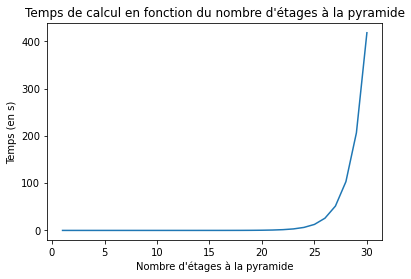

In [8]:
# Temps d'execution
N_list = [i for i in range(1,31)]
time_list = []
for N in N_list:
    temp_Tr = []
    for j in range(N):
        temp_tab = []
        for x in range(j+1):
            elem = random.randint(1,30)
            temp_tab.append(elem)

        temp_Tr.append(temp_tab)
    
    start = time.time()
    temp_Mre = approche_optimale(temp_Tr)
    end = time.time()
    time_list.append(float(end-start))
    print("- For N : " + str(N) + " - time : " + str(round(end-start,2)) + "s")
    
plt.ion()
plt.plot(N_list, time_list)
plt.title("Temps de calcul en fonction du nombre d'étages à la pyramide")
plt.xlabel("Nombre d'étages à la pyramide")
plt.ylabel("Temps (en s)")
plt.ioff()
plt.savefig("evolution_temps_chemin_optimale.png")

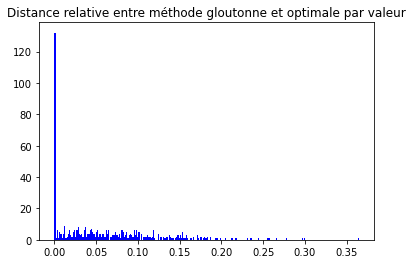

In [6]:
nb_tests = 500
optimal_list = []
glouton_list = []
dist_list = []

for i in range(nb_tests):
    N = random.randint(5,20)
    temp_Tr = []
    for j in range(N):
        temp_tab = []
        for x in range(j+1):
            elem = random.randint(1,30)
            temp_tab.append(elem)

        temp_Tr.append(temp_tab)

    temp_Mre = approche_optimale(temp_Tr)
    temp_path_glou,temp_cout_glou = approche_gloutonne(temp_Tr)

    optimal_list.append(temp_Mre[0][0])
    glouton_list.append(temp_cout_glou)
    dist_list.append((temp_Mre[0][0] - temp_cout_glou) / temp_Mre[0][0])

num_bins = len(dist_list)//2
plt.hist(dist_list, num_bins, facecolor = 'blue', alpha = 1 )
plt.title("Distance relative entre méthode gloutonne et optimale par valeur")
plt.show()